# Import Packages

In [137]:
# import packages

# general tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
from io import StringIO

# RDkit
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem

# Prepare Data

## Prepare Data: ChEMBL_hERG_IC50_data

In [138]:
# import data

dataframe = pd.read_csv("data/ChEMBL_hERG/ChEMBL_hERG_IC50_data.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  9887


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id
0,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,1,IC50,=,32.2,nM,F,CHEMBL691014
1,O=C(O[C@@H]1C[C@@H]2C[C@H]3C[C@H](C1)N2CC3=O)c...,1,IC50,=,5950.0,nM,F,CHEMBL691013
2,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,1,IC50,=,143.0,nM,F,CHEMBL691014
3,CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(...,1,IC50,=,196.0,nM,F,CHEMBL877203
4,CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,1,IC50,=,173.0,nM,F,CHEMBL691014
...,...,...,...,...,...,...,...,...
9882,O=c1cc(NC2CCN(S(=O)(=O)C(F)(F)F)CC2)c2cc(C(c3c...,0,IC50,>,50000.0,nM,B,CHEMBL4276288
9883,Cc1nc2n(c(=O)c1CCN1CCC(c3noc4cc(F)ccc34)CC1)CCCC2,1,IC50,=,167.1,nM,B,CHEMBL4276588
9884,O=C(CCCN1CCC(c2noc3cc(F)ccc23)CC1)c1cc2c3c(c1)...,1,IC50,=,823.7,nM,B,CHEMBL4276588
9885,O=C(CCCCN1CCC(c2noc3cc(F)ccc23)CC1)c1cc2c3c(c1...,1,IC50,=,2905.4,nM,B,CHEMBL4276588


In [139]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['Smiles'].isnull()])
display(dataframe[dataframe['Class'].isnull()])
display(dataframe[dataframe['Value_type'].isnull()])
display(dataframe[dataframe['Relation'].isnull()])
display(dataframe[dataframe['Activity'].isnull()])
display(dataframe[dataframe['Unit'].isnull()])
display(dataframe[dataframe['Assay_type'].isnull()])
display(dataframe[dataframe['Assay_id'].isnull()])

,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


,Smiles,Class,Value_type,Relation,Activity,Unit,Assay_type,Assay_id


In [140]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["Smiles"].values)):

    smiles = dataframe["Smiles"].values[k]

    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["Smiles"].isin(bad_smiles) == False]

print(len(dataframe))

9887


In [141]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["Class"].values))
N_negative = len(dataframe["Class"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  5013
N_negative =  4874
Total fraction of positives =  0.5070294325882472


In [9]:
# create balanced data set by undersampling the positive class so that number of molecules becomes exactly the same in each class

N_positive_delete = len(dataframe["Class"].values) - 2*len(dataframe[dataframe["Class"] == 0].values)

dataframe = dataframe.drop(dataframe[dataframe["Class"] == 1].sample(n = N_positive_delete, random_state = 42).index)

print("N_positive_delete = ", N_positive_delete)

N_positive_delete =  139


In [10]:
# reduce size of data set if wanted

N_delete = 4174 + 200 - 500
dataframe = dataframe.drop(dataframe[dataframe["Class"] == 1].sample(n = N_delete, random_state = 42).index)
dataframe = dataframe.drop(dataframe[dataframe["Class"] == 0].sample(n = N_delete, random_state = 42).index)

In [11]:
# define number of molecules

N_molecules = len(dataframe["Class"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  2000


1451


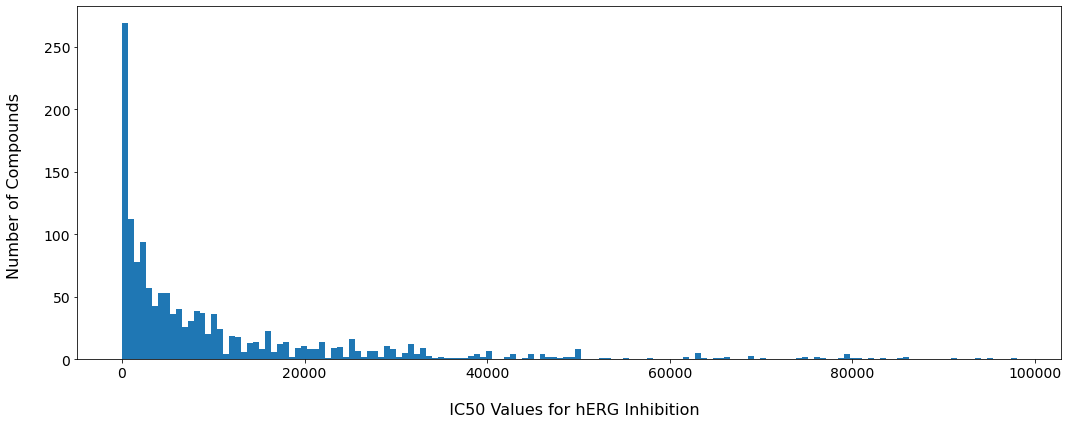

In [12]:
# plot histogram for IC50 values for all IC50 values smaller than 100000

y_vals = dataframe[dataframe["Relation"] == "="].loc[:,"Activity"].values
y_vals = y_vals[y_vals <100000]
print(len(y_vals))

plt.figure(figsize = (15,6))
plt.hist(y_vals, bins = 150)
plt.xlabel("\n  IC50 Values for hERG Inhibition", fontsize = 16)
plt.ylabel("Number of Compounds \n", fontsize = 16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

plt.tight_layout()
plt.plot();

In [13]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"Class"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  1000
Fraction of Positives =  0.5
Shape of y =  (2000,)
Shape of Y =  (2000, 1)

 y =  [1 1 1 ... 1 0 0]


                  Smiles String
CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(F)F)ccc12


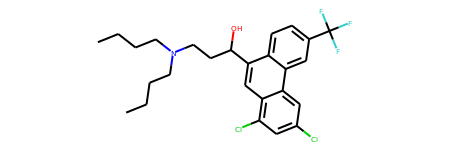

Shape of x_smiles =  (2000,)
Shape of X_smiles =  (2000, 1)

 x_smiles =  ['CCCCN(CCCC)CCC(O)c1cc2c(Cl)cc(Cl)cc2c2cc(C(F)(F)F)ccc12'
 'CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1'
 'O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc23)CC1'
 'CN(C)CCC=C1c2ccccc2CCc2ccccc21'
 'COc1c(N2CCNC(C)C2)c(F)cc2c(=O)c(C(=O)O)cn(C3CC3)c12'
 'CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1'
 'CN(CCOc1ccc(NS(C)(=O)=O)cc1)CCc1ccc(NS(C)(=O)=O)cc1'
 'Cc1c(F)c(N2CCNC(C)C2)cc2c1c(=O)c(C(=O)O)cn2C1CC1'
 'C1CCC(C(CC2CCCCN2)C2CCCCC2)CC1'
 'CN1CCN(CCCCN2C(=O)CN(/N=C/c3ccc(-c4ccc(Cl)cc4)o3)C2=O)CC1']


In [14]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["Smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: ChEMBL_SARS_CoV_2_Caco_2

In [142]:
# import data

dataframe = pd.read_csv("data/ChEMBL_SARS_CoV_2_Caco_2/ChEMBL4303805_essential_all_smiles.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  5632


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL4303167,NaN,0,1093.33,None,None,CASPOFUNGIN (ACETATE),CCC(C)CC(C)CCCCCCCCC(=O)N[C@H]1C[C@@H](O)[C@@H...,=',39.79,%
1,CHEMBL299879,NaN,0,471.62,0,04.07,NTNCB,O=[N+]([O-])c1ccccc1S(=O)(=O)NC[C@H]1CC[C@H](C...,=',92.74,%
2,CHEMBL555654,ADIPHENINE HYDROCHLORIDE,0,347.89,0,3.7,ADIPHENINE HYDROCHLORIDE,CCN(CC)CCOC(=O)C(c1ccccc1)c1ccccc1.Cl,=',0.38,%
3,CHEMBL173929,LUTEIN,3,568.89,2,10.4,LUTEIN,CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...,=',17.37,%
4,CHEMBL435734,ARCTIGENIN,0,372.42,0,2.99,Arctigenin,COc1cc(C[C@H]2C(=O)OC[C@@H]2Cc2ccc(OC)c(OC)c2)...,=',0.61,%
...,...,...,...,...,...,...,...,...,...,...,...
5627,CHEMBL1449747,NaN,0,353.23,0,4.36,MDIVI-1,COc1cc(-n2c(=S)[nH]c3ccccc3c2=O)c(Cl)cc1Cl,=',34.05,%
5628,CHEMBL1134,DECAMETHONIUM BROMIDE,4,418.3,0,3.52,DECAMETHONIUM BROMIDE,C[N+](C)(C)CCCCCCCCCC[N+](C)(C)C.[Br-].[Br-],=',-0.43,%
5629,CHEMBL1564377,NaN,0,116.12,0,-1.06,HA-966-(S)-(-),N[C@H]1CCN(O)C1=O,=',9.13,%
5630,CHEMBL1601669,ALFACALCIDOL,4,400.65,1,6.59,ALFACALCIDOL,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,=',-5.42,%


In [143]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['Smiles'].isnull()])
display(dataframe[dataframe['Standard Value'].isnull()])

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Relation,Standard Value,Standard Units


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Relation,Standard Value,Standard Units


In [144]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["Smiles"].values)):

    smiles = dataframe["Smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["Smiles"].isin(bad_smiles) == False]

print(len(dataframe))

5632


In [145]:
# define inhibitor threshold value such that molecules with value >= inhibitor_threshold are counted as active

inhibitor_threshold = 75 # corresponds to 75 % inhibition of of SARS-CoV-2 induced cytotoxicity

print("Inhibitor Threshold = ", inhibitor_threshold)

Inhibitor Threshold =  75


In [146]:
# compute number of positive and negative instances

N_positive = len(dataframe[dataframe["Standard Value"] >= inhibitor_threshold].values)
N_negative = len(dataframe[dataframe["Standard Value"] < inhibitor_threshold].values)

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  273
N_negative =  5359
Total fraction of positives =  0.04847301136363636


In [20]:
# create balanced data set by undersampling the negative class which has value < inhibitor_threshold so that same number of molecules remains in each class

N_negative_delete = len(dataframe["Standard Value"].values) - 2*len(dataframe[dataframe["Standard Value"] >= inhibitor_threshold].values)

dataframe = dataframe.drop(dataframe[dataframe["Standard Value"] < inhibitor_threshold].sample(n = N_negative_delete, random_state = 42).index)

print("N_negative_delete = ", N_negative_delete)

N_negative_delete =  5086


In [21]:
# define number of molecules

N_molecules = len(dataframe["Smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  546


In [22]:
# construct target variable Y (inhibition of cytotoxicity)

y_vals = np.reshape(dataframe["Standard Value"].values, (N_molecules,))*0.01
y = np.zeros(N_molecules)

y[y_vals > inhibitor_threshold] = 1
y[y_vals <= inhibitor_threshold] = 0

# transform label to standard data type of numpy array filled with integers
y = np.array(list(y))
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)

print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y[0:20])

Number of Positives =  0.0
Fraction of Positives =  0.0
Shape of y =  (546,)
Shape of Y =  (546, 1)

 y =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


                  Smiles String
O=[N+]([O-])c1ccccc1S(=O)(=O)NC[C@H]1CC[C@H](CNCC2CCc3ccccc3C2)CC1


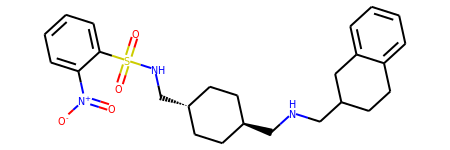

Shape of x_smiles =  (546,)
Shape of X_smiles =  (546, 1)

 x_smiles =  ['O=[N+]([O-])c1ccccc1S(=O)(=O)NC[C@H]1CC[C@H](CNCC2CCc3ccccc3C2)CC1'
 'CN(C)CCNc1nc2cc(O)ccc2c2c1C(=O)c1ccccc1-2'
 'CC[C@]12CCCN3CCc4c(n(c5ccccc45)[C@](O)(C(=O)OC)C1)[C@@H]32'
 'C/C(=N\\NC(=S)N1CCC1)c1ccccn1'
 'O=C(O)c1ccc2cc(-c3ccc(O)c(C45CC6CC(CC(C6)C4)C5)c3)ccc2c1'
 'C[S@@+]([O-])CCCCN=C=S'
 'O=C(CCCN1CCC2(CC1)C(=O)N(Cc1cccc(F)c1)CN2c1ccccc1)c1ccc(F)cc1'
 'CCNC1=Nc2ccc(Cl)cc2C(C)(c2ccccc2)O1' 'C#CCN(C)Cc1ccccc1.Cl'
 'C=CC(=O)Nc1cccc(Nc2nc(Nc3ccc(N4CCN(C(C)=O)CC4)cc3OC)ncc2C(F)(F)F)c1']


In [23]:
# extract Smiles strings and plot molecules

X_smiles = np.reshape(dataframe["Smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_HIV

In [147]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_HIV/HIV.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  41127


,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


In [148]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['activity'].isnull()])
display(dataframe[dataframe['HIV_active'].isnull()])

,smiles,activity,HIV_active


,smiles,activity,HIV_active


,smiles,activity,HIV_active


In [149]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING" :
        print(k)
        print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

41127


In [151]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["HIV_active"].values))
N_negative = len(dataframe["HIV_active"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  1443
N_negative =  39684
Total fraction of positives =  0.03508643956524911


In [28]:
# create balanced data set by undersampling the negative class so that number of molecules becomes exactly the same in each class

N_negative_delete = len(dataframe["HIV_active"].values) - 2*len(dataframe[dataframe["HIV_active"] == 1].values)

dataframe = dataframe.drop(dataframe[dataframe["HIV_active"] == 0].sample(n = N_negative_delete, random_state = 42).index)

print("N_negative_delete = ", N_negative_delete)

N_negative_delete =  38241


In [29]:
# define number of molecules

N_molecules = len(dataframe["HIV_active"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  2886


In [30]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"HIV_active"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  1443
Fraction of Positives =  0.5
Shape of y =  (2886,)
Shape of Y =  (2886, 1)

 y =  [0 1 1 ... 1 1 1]


                  Smiles String
O=[N+]([O-])c1ccccc1SSc1ccccc1[N+](=O)[O-]


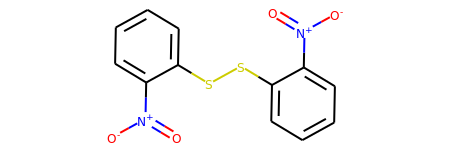

Shape of x_smiles =  (2886,)
Shape of X_smiles =  (2886, 1)

 x_smiles =  ['O=[N+]([O-])c1ccccc1SSc1ccccc1[N+](=O)[O-]'
 'O=C(O)Cc1ccc(SSc2ccc(CC(=O)O)cc2)cc1' 'NNP(=S)(NN)c1ccccc1'
 'Nc1c(Cl)cc(Cl)cc1C(=O)O' 'Nc1cc(Cl)c(S(=O)(=O)O)cc1Cl'
 'O=C1O[Cu-5]2(O)(O)(OC1=O)OC(=O)C(=O)O2' 'O=Nc1ccc(O)c(N=O)c1O'
 'O=S1(=O)CCCc2c1ccc1ccccc21' 'O=C1NC2NC(=O)NC2N1' 'N=C1NCCS1']


In [31]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_BBBP

In [152]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_BBBP/BBBP.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  2050


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [153]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['p_np'].isnull()])
display(dataframe[dataframe['name'].isnull()])
display(dataframe[dataframe['num'].isnull()])

,num,name,p_np,smiles


,num,name,p_np,smiles


,num,name,p_np,smiles


,num,name,p_np,smiles


In [154]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(k)
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

2039


In [155]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["p_np"].values))
N_negative = len(dataframe["p_np"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  1560
N_negative =  479
Total fraction of positives =  0.7650809220205983


In [37]:
# create balanced data set by undersampling the positive class so that number of molecules becomes exactly the same in each class

N_positive_delete = len(dataframe["p_np"].values) - 2*len(dataframe[dataframe["p_np"] == 0].values)

dataframe = dataframe.drop(dataframe[dataframe["p_np"] == 1].sample(n = N_positive_delete, random_state = 42).index)

print("N_positive_delete = ", N_positive_delete)

N_positive_delete =  1081


In [38]:
# define number of molecules

N_molecules = len(dataframe["p_np"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  958


In [39]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"p_np"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  479
Fraction of Positives =  0.5
Shape of y =  (958,)
Shape of Y =  (958, 1)

 y =  [1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

                  Smiles String
C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl


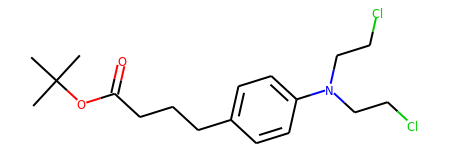

Shape of x_smiles =  (958,)
Shape of X_smiles =  (958, 1)

 x_smiles =  ['C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl'
 'Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)[C@@H](N4C3=O)C(O)=O'
 'COc1ccc(cc1)[C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O'
 'OCC(C)(O)c1onc(c2ncn3c2CN(C)C(c4c3cccc4Cl)=O)n1' 'C(Cl)Cl'
 'CCC(=O)C(CC(C)N(C)C)(c1ccccc1)c2ccccc2'
 'CCN1N=NN(CCN2CCC(CC2)(COC)N(C(=O)CC)c3ccccc3)C1=O'
 'CN1C2CCC1CC(C2)OC(=O)[C@H](CO)c3ccccc3'
 'COc1ccc(Cl)cc1C(=O)NCCc2ccc(cc2)[S](=O)(=O)NC(=O)NC3CCCCC3' 'CCCC(C)C']


In [40]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_BACE

In [156]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_BACE/BACE.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  1513


,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.855410,107.434910,37.133846,0.000000,7.980170,0.000000,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.676940,174.076750,34.923889,7.980170,24.148668,0.000000,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.406520,255.752550,23.654478,0.230159,15.879790,0.000000,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.353040,202.763350,36.498634,0.980913,8.188327,0.000000,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.712880,220.461300,23.654478,0.230159,15.879790,0.000000,26.100143,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,0,Test,3.000000,364.86969,2.5942,3,2,6,...,37.212799,37.681076,180.226410,95.670128,30.107586,9.368159,7.980170,0.000000,0.000000,1543
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,0,Test,3.000000,357.83731,2.8229,3,2,6,...,45.792797,47.349350,122.401500,99.877144,30.107586,9.368159,7.980170,0.000000,0.000000,1544
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,0,Test,2.953115,320.18451,3.0895,2,1,2,...,47.790600,22.563574,96.290794,58.798935,20.071724,9.368159,0.000000,6.904104,0.000000,1545
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,0,Test,2.733298,317.38440,3.8595,2,1,3,...,77.219978,9.316234,95.907784,112.609720,20.071724,9.368159,0.000000,6.904104,0.000000,1546


In [157]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['mol'].isnull()])
display(dataframe[dataframe['Class'].isnull()])

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID


,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID


In [158]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["mol"].values)):

    smiles = dataframe["mol"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["mol"].isin(bad_smiles) == False]

print(len(dataframe))

1513


In [159]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["Class"].values))
N_negative = len(dataframe["Class"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  691
N_negative =  822
Total fraction of positives =  0.456708526107072


In [45]:
# create balanced data set by undersampling the negative class so that number of molecules becomes exactly the same in each class

N_negative_delete = len(dataframe["Class"].values) - 2*len(dataframe[dataframe["Class"] == 1].values)

dataframe = dataframe.drop(dataframe[dataframe["Class"] == 0].sample(n = N_negative_delete, random_state = 42).index)

print("N_negative_delete = ", N_negative_delete)

N_negative_delete =  131


In [46]:
# define number of molecules

N_molecules = len(dataframe["Class"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  1382


In [47]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"Class"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  691
Fraction of Positives =  0.5
Shape of y =  (1382,)
Shape of Y =  (1382, 1)

 y =  [1 1 1 ... 0 0 0]


                  Smiles String
O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2ccccc2C)C)CC1(C)C


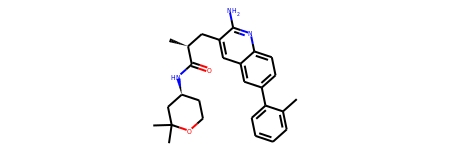

Shape of x_smiles =  (1382,)
Shape of X_smiles =  (1382, 1)

 x_smiles =  ['O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2ccccc2C)C)CC1(C)C'
 'Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(=O)C)(CC(C)C)C1=O)CCc1ccccc1)[C@H](O)[C@@H]1[NH2+]C[C@H](OCCC)C1'
 'S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(OC)ccc1)Cc1ccccc1)C'
 'S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c(N)c(F)c2)[C@H](O)[C@@H]([NH2+]Cc2cc(ccc2)C(C)(C)C)C1'
 'S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(ccc1)C(F)(F)F)Cc1ccccc1)C'
 'S1(=O)C[C@@H](Cc2cc(OC(C(F)(F)F)C(F)(F)F)c(N)c(F)c2)[C@H](O)[C@@H]([NH2+]Cc2cc(ccc2)C(C)(C)C)C1'
 'S(=O)(=O)(CCCCC)C[C@@H](NC(=O)c1cccnc1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(ccc1)CC)Cc1cc(F)cc(F)c1'
 'Fc1c2c(ccc1)[C@@]([NH+]=C2N)(C=1C=C(C)C(=O)N(C=1)CC)c1cc(ccc1)-c1cc(cnc1)C#CC'
 'O1c2c(cc(cc2)CC)[C@@H]([NH2+]C[C@@H](O)[C@H]2NC(=O)C=3C=CC(=O)N(CCCCc4cc(C2)ccc4)C=3)CC12CCC2'
 'O=C1N(CCCC1)C(C)(C)[C@@H]1C[C@@H](CCC1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(ccc1)C(

In [48]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["mol"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_ClinTox

In [160]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_ClinTox/ClinTox.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  1484


,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0
...,...,...,...
1479,O[Si](=O)O,1,0
1480,O=[Ti]=O,1,0
1481,O=[Zn],1,0
1482,OCl(=O)(=O)=O,1,0


In [161]:
# choose target variable

target = "FDA_APPROVED"

In [162]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe[target].isnull()])
display(dataframe[dataframe['CT_TOX'].isnull()])

,smiles,FDA_APPROVED,CT_TOX


,smiles,FDA_APPROVED,CT_TOX


,smiles,FDA_APPROVED,CT_TOX


In [163]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(k)
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

1478


In [164]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe[target].values))
N_negative = len(dataframe[target]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  1384
N_negative =  94
Total fraction of positives =  0.9364005412719891


In [54]:
# create balanced data set by undersampling the larger class so that number of molecules becomes exactly the same in each class

if N_positive < N_negative:
    N_negative_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 1].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 0].sample(n = N_negative_delete, random_state = 42).index)
    print("N_negative_delete = ", N_negative_delete)
    
if N_positive > N_negative:
    N_positive_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 0].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 1].sample(n = N_positive_delete, random_state = 42).index)
    print("N_positive_delete = ", N_positive_delete)
    

N_positive_delete =  1290


In [55]:
# define number of molecules

N_molecules = len(dataframe[target].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  188


In [56]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,target].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  94
Fraction of Positives =  0.5
Shape of y =  (188,)
Shape of Y =  (188, 1)

 y =  [0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1]


                  Smiles String
[Se]


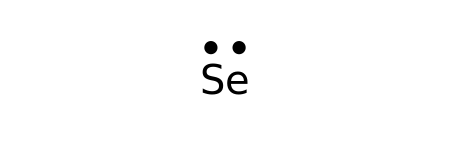

Shape of x_smiles =  (188,)
Shape of X_smiles =  (188, 1)

 x_smiles =  ['[Se]' 'B([C@H](CC(C)C)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C2=NC=CN=C2)(O)O'
 'B([C@H](CC(C)C)NC(=O)CNC(=O)C1=C(C=CC(=C1)Cl)Cl)(O)O'
 'C#CC[NH2+][C@@H]1CCc2c1cccc2'
 'C#CCC(Cc1cnc2c(n1)c(nc(n2)N)N)c3ccc(cc3)C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-]'
 'C([C@@H]1[C@H]([C@@H]([C@H]([C@@H](O1)O[C@]2([C@H]([C@@H]([C@H](O2)OS(=O)(=O)O[Al](O)O)OS(=O)(=O)O[Al](O)O)OS(=O)(=O)O[Al](O)O)COS(=O)(=O)O[Al](O)O)OS(=O)(=O)O[Al](O)O)OS(=O)(=O)O[Al](O)O)OS(=O)(=O)O[Al](O)O)OS(=O)(=O)O[Al](O)O'
 'C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O)F)O)O)O' 'C(C(CO)(CO)[NH3+])O'
 'C(CS(=O)(=O)[O-])S' 'C1[C@@H]([C@H](O[C@H]1N2C=NC(=NC2=O)N)CO)O']


In [57]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_Tox21

In [167]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_Tox21/Tox21.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  7831


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [168]:
# choose target variable

target = "NR-AR-LBD"

In [169]:
# check for missing values (i.e. NA values)

print("Missing: ", len(dataframe[dataframe[target].isnull()]))
display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe[target].isnull()])


Missing:  1073


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
7,0.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,TOX25232,O=C(O)Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX22517,CCCCCCCC(=O)[O-].CCCCCCCC(=O)[O-].[Zn+2]
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX26526,CCOC(=O)c1cccnc1
33,0.0,NaN,1.0,NaN,NaN,0.0,NaN,1.0,0.0,0.0,1.0,1.0,TOX1106,Oc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,TOX27854,CN1CCc2cc3c(cc2C1O)OCO3
7798,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,TOX9602,CCCC(c1cc(C(C)(C)C)c(O)cc1C)c1cc(C(C)(C)C)c(O)...
7799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX25983,O=c1[nH]cnc2nc[nH]c12
7801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX25987,CN1CC(=O)NC1=N


In [170]:
# remove rows corresponding to NaNs for target variable

NaN_indices = dataframe[dataframe[target].isnull()].index
dataframe = dataframe.drop(NaN_indices)

In [171]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(k)
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

6758


In [172]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe[target].values))
N_negative = len(dataframe[target]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  237
N_negative =  6521
Total fraction of positives =  0.03506954720331459


In [64]:
# create balanced data set by undersampling the larger class so that number of molecules becomes exactly the same in each class

if N_positive < N_negative:
    N_negative_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 1].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 0].sample(n = N_negative_delete, random_state = 42).index)
    print("N_negative_delete = ", N_negative_delete)
    
if N_positive > N_negative:
    N_positive_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 0].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 1].sample(n = N_positive_delete, random_state = 42).index)
    print("N_positive_delete = ", N_positive_delete)
    

N_negative_delete =  6284


In [65]:
# define number of molecules

N_molecules = len(dataframe[target].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  474


In [66]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,target].values.astype(int)
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  237
Fraction of Positives =  0.5
Shape of y =  (474,)
Shape of Y =  (474, 1)

 y =  [0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1
 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1
 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0

                  Smiles String
CC(C)N(c1ccccc1)C(C)C


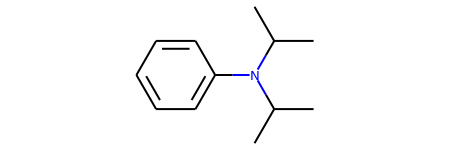

Shape of x_smiles =  (474,)
Shape of X_smiles =  (474, 1)

 x_smiles =  ['CC(C)N(c1ccccc1)C(C)C' 'CCC(COC(=O)CCS)(COC(=O)CCS)COC(=O)CCS'
 'C[C@]12CC[C@H]3[C@@H](CC[C@@]45O[C@@H]4C(O)=C(C#N)C[C@]35C)[C@@H]1CC[C@@H]2O'
 'ONc1ccccc1'
 'C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CC[C@]2(O)C(=O)COP(=O)([O-])[O-]'
 'O=C1CCCN1' 'O=c1n(CCO)c(=O)n(CCO)c(=O)n1CCO'
 'O=c1oc2cc(O)ccc2c2oc3cc(O)ccc3c12'
 'CCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1'
 'CCOP(=S)(NC(C)C)Oc1ccccc1C(=O)OC(C)C']


In [67]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_SIDER

In [173]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_SIDER/SIDER.csv")

print("Number of Molecules = ", len(dataframe), "\n")

print("Targets = \n")
display(list(dataframe.columns.values[1:]))

display(dataframe)

Number of Molecules =  1427 

Targets = 



['Hepatobiliary disorders',
 'Metabolism and nutrition disorders',
 'Product issues',
 'Eye disorders',
 'Investigations',
 'Musculoskeletal and connective tissue disorders',
 'Gastrointestinal disorders',
 'Social circumstances',
 'Immune system disorders',
 'Reproductive system and breast disorders',
 'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
 'General disorders and administration site conditions',
 'Endocrine disorders',
 'Surgical and medical procedures',
 'Vascular disorders',
 'Blood and lymphatic system disorders',
 'Skin and subcutaneous tissue disorders',
 'Congenital, familial and genetic disorders',
 'Infections and infestations',
 'Respiratory, thoracic and mediastinal disorders',
 'Psychiatric disorders',
 'Renal and urinary disorders',
 'Pregnancy, puerperium and perinatal conditions',
 'Ear and labyrinth disorders',
 'Cardiac disorders',
 'Nervous system disorders',
 'Injury, poisoning and procedural complications']

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(CC[C@@]1(C)C2=CC(=CC=C2)O)C[C@H](CC3...,0,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1423,CC[C@@H]1[C@@]2([C@@H]([C@@H](C(=O)[C@@H](C[C@...,1,1,0,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,1,1
1424,CCOC1=CC=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...,1,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,0,1,1,1
1425,C1CN(CCC1N2C3=CC=CC=C3NC2=O)CCCC(C4=CC=C(C=C4)...,0,1,0,1,1,1,1,0,0,...,0,0,0,1,1,0,0,1,1,1


In [174]:
# choose target variable

target = 'Immune system disorders'

In [175]:
# check for missing values (i.e. NA values)

print("Missing: ", len(dataframe[dataframe[target].isnull()]))
display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe[target].isnull()])


Missing:  0


,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"


,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"


In [176]:
# remove rows corresponding to NaNs for target variable

NaN_indices = dataframe[dataframe[target].isnull()].index
dataframe = dataframe.drop(NaN_indices)

In [177]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(k)
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

1427


In [178]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe[target].values))
N_negative = len(dataframe[target]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  1024
N_negative =  403
Total fraction of positives =  0.7175893482831114


In [74]:
# create balanced data set by undersampling the larger class so that number of molecules becomes exactly the same in each class

if N_positive < N_negative:
    N_negative_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 1].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 0].sample(n = N_negative_delete, random_state = 42).index)
    print("N_negative_delete = ", N_negative_delete)
    
if N_positive > N_negative:
    N_positive_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 0].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 1].sample(n = N_positive_delete, random_state = 42).index)
    print("N_positive_delete = ", N_positive_delete)
    

N_positive_delete =  621


In [75]:
# define number of molecules

N_molecules = len(dataframe[target].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  806


In [76]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,target].values.astype(int)
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  403
Fraction of Positives =  0.5
Shape of y =  (806,)
Shape of Y =  (806, 1)

 y =  [0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0
 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0

                  Smiles String
C(CNCCNCCNCCN)N


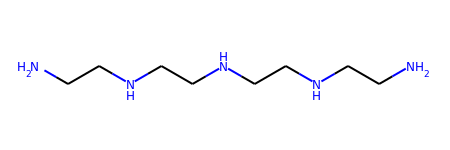

Shape of x_smiles =  (806,)
Shape of X_smiles =  (806, 1)

 x_smiles =  ['C(CNCCNCCNCCN)N'
 'CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=O)O)C(C)(C)C'
 'CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34'
 'CC1CC2C3CCC4=CC(=O)C=CC4([C@]3(C(CC2([C@]1(C(=O)CCl)O)C)O)F)C'
 'CC(C)CN(C[C@H]([C@H](CC1=CC=CC=C1)NC(=O)O[C@H]2CO[C@@H]3[C@H]2CCO3)O)S(=O)(=O)C4=CC=C(C=C4)N'
 'C1CC[C@H]([C@@H](C1)CN2CCN(CC2)C3=NSC4=CC=CC=C43)CN5C(=O)[C@H]6[C@@H]7CC[C@@H](C7)[C@H]6C5=O'
 'C[N+](C)(C)CC(CC(=O)O)O' 'CN1C2=C(C=C(C=C2)N(CCCl)CCCl)N=C1CCCC(=O)O'
 'C(CC(=O)O)CN'
 'C[C@H]1C[C@H]2[C@@H]3C[C@@H](C4=CC(=O)C=C[C@@]4([C@]3([C@H](C[C@@]2([C@]1(C(=O)CCl)O)C)O)F)C)F']


In [77]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MoleculeNet_MUV

In [179]:
# import data

dataframe = pd.read_csv("data/MoleculeNet_MUV/MUV.csv")

print("Number of Molecules = ", len(dataframe), "\n")

print("Targets = \n")
display(list(dataframe.columns.values[:-2]))

display(dataframe)

Number of Molecules =  93087 

Targets = 



['MUV-466',
 'MUV-548',
 'MUV-600',
 'MUV-644',
 'MUV-652',
 'MUV-689',
 'MUV-692',
 'MUV-712',
 'MUV-713',
 'MUV-733',
 'MUV-737',
 'MUV-810',
 'MUV-832',
 'MUV-846',
 'MUV-852',
 'MUV-858',
 'MUV-859']

,MUV-466,MUV-548,MUV-600,MUV-644,MUV-652,MUV-689,MUV-692,MUV-712,MUV-713,MUV-733,MUV-737,MUV-810,MUV-832,MUV-846,MUV-852,MUV-858,MUV-859,mol_id,smiles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CID2957283,O=C(NCc1ccccc1Cl)C1CCCO1
93083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CID414138,COc1cc(NCCCCCN2C(=O)c3ccccc3C2=O)c2ncccc2c1
93084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CID718652,CCN(CC)c1ccc(/C=C2/C(=O)ON=C2C)cc1
93085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,CID2446949,Cc1cc(=O)oc2cc(OCC(=O)c3ccc4c(c3)NC(=O)CO4)ccc12


In [180]:
# choose target variable

target = 'MUV-466'

In [181]:
# check for missing values (i.e. NA values)

print("Missing: ", len(dataframe[dataframe[target].isnull()]))
display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['mol_id'].isnull()])
display(dataframe[dataframe[target].isnull()])


Missing:  78246


,MUV-466,MUV-548,MUV-600,MUV-644,MUV-652,MUV-689,MUV-692,MUV-712,MUV-713,MUV-733,MUV-737,MUV-810,MUV-832,MUV-846,MUV-852,MUV-858,MUV-859,mol_id,smiles


,MUV-466,MUV-548,MUV-600,MUV-644,MUV-652,MUV-689,MUV-692,MUV-712,MUV-713,MUV-733,MUV-737,MUV-810,MUV-832,MUV-846,MUV-852,MUV-858,MUV-859,mol_id,smiles


,MUV-466,MUV-548,MUV-600,MUV-644,MUV-652,MUV-689,MUV-692,MUV-712,MUV-713,MUV-733,MUV-737,MUV-810,MUV-832,MUV-846,MUV-852,MUV-858,MUV-859,mol_id,smiles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CID2999671,CCn1c(CSc2nccn2C)nc2cc(C(=O)O)ccc21
6,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,CID5390007,CCc1cccc2c1NC(=O)C21C2C(=O)N(Cc3ccccc3)C(=O)C2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CID2957283,O=C(NCc1ccccc1Cl)C1CCCO1
93083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CID414138,COc1cc(NCCCCCN2C(=O)c3ccccc3C2=O)c2ncccc2c1
93084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CID718652,CCN(CC)c1ccc(/C=C2/C(=O)ON=C2C)cc1
93085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,CID2446949,Cc1cc(=O)oc2cc(OCC(=O)c3ccc4c(c3)NC(=O)CO4)ccc12


In [182]:
# remove rows corresponding to NaNs for target variable

NaN_indices = dataframe[dataframe[target].isnull()].index
dataframe = dataframe.drop(NaN_indices)

In [183]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(k)
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

14841


In [184]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe[target].values))
N_negative = len(dataframe[target]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  27
N_negative =  14814
Total fraction of positives =  0.0018192844147968466


In [84]:
# create balanced data set by undersampling the larger class so that number of molecules becomes exactly the same in each class

if N_positive < N_negative:
    N_negative_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 1].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 0].sample(n = N_negative_delete, random_state = 42).index)
    print("N_negative_delete = ", N_negative_delete)
    
if N_positive > N_negative:
    N_positive_delete = len(dataframe[target].values) - 2*len(dataframe[dataframe[target] == 0].values)
    dataframe = dataframe.drop(dataframe[dataframe[target] == 1].sample(n = N_positive_delete, random_state = 42).index)
    print("N_positive_delete = ", N_positive_delete)
    

N_negative_delete =  14787


In [85]:
# define number of molecules

N_molecules = len(dataframe[target].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  54


In [86]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,target].values.astype(int)
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  27
Fraction of Positives =  0.5
Shape of y =  (54,)
Shape of Y =  (54, 1)

 y =  [0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1]


                  Smiles String
CN(C)c1oc(-c2ccc(OCc3ccc(Cl)cc3)cc2)nc1C#N


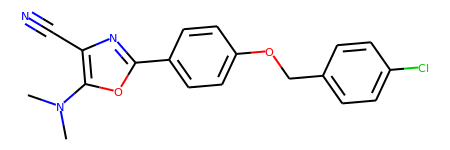

Shape of x_smiles =  (54,)
Shape of X_smiles =  (54, 1)

 x_smiles =  ['CN(C)c1oc(-c2ccc(OCc3ccc(Cl)cc3)cc2)nc1C#N'
 'CCOc1ccc(C(=O)Nc2c(C(N)=O)oc3ccccc23)cc1'
 'Cc1[nH]n(-c2ccccc2)c(=O)c1-c1ccccc1'
 'Cc1c(Cl)cccc1N(CC(=O)NC1CCCCC1)S(C)(=O)=O'
 'COc1cccc(OC)c1-c1nnc(-c2cn(C)c3ccccc23)o1'
 'CCCC(=O)Nc1ccc2oc(-c3ccc(OC)c(Br)c3)nc2c1'
 'O=C(CSc1nnc(Cn2nnc3ccccc32)o1)N(Cc1ccc(F)cc1)c1ccccc1'
 'Cn1c(=O)[nH]c(=O)c2c1nc(Br)n2CCCO' 'Cc1ccc(OCc2nc(-c3ccccc3)no2)c(C)c1'
 'COc1ccccc1-c1cc(C(=O)Nc2ccccc2SC)no1']


In [87]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: Benchmark_Paper_2018_hERG_T2

In [193]:
# import data

dataframe = pd.read_csv("data/Benchmark_Paper_2018_hERG/datasets/training/chembl_training_T2.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  5804


,id,can_smiles,ac
0,CHEMBL410234,Cc1cc(C)n(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n...,1
1,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,1
2,CHEMBL3609749,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,1
3,CHEMBL1080117,Cc1ccc2c(-c3nnc(SCCCN4CC5CC5(c5ccc(Cl)cc5)C4)n...,1
4,CHEMBL488069,CN(C)Cc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)c(Cl)c1,1
...,...,...,...
5799,CHEMBL247690,O=C(NC1CCN(Cc2ccc(OCCCN3CCOCC3)c(F)c2)CC1)c1cc...,0
5800,CHEMBL2314058,O=C(N1CCc2ncc(C(F)(F)F)cc2C1)C12CCCC1CC(NC1CCC...,0
5801,CHEMBL2348780,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3=CCC2(C)C1(O)C(=O)CO,0
5802,CHEMBL384111,O=C(NC1CCN(C2CCc3cc4oc(=O)[nH]c4cc32)CC1)c1cc(...,0


In [194]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['id'].isnull()])
display(dataframe[dataframe['can_smiles'].isnull()])
display(dataframe[dataframe['ac'].isnull()])

,id,can_smiles,ac


,id,can_smiles,ac


,id,can_smiles,ac


In [195]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["can_smiles"].values)):

    smiles = dataframe["can_smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        #print(error_message)
        #print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["can_smiles"].isin(bad_smiles) == False]

print(len(dataframe))

5804


In [196]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["ac"].values))
N_negative = len(dataframe["ac"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  4096
N_negative =  1708
Total fraction of positives =  0.7057201929703653


In [92]:
# create balanced data set by undersampling the positive class so that number of molecules becomes exactly the same in each class

N_positive_delete = len(dataframe["ac"].values) - 2*len(dataframe[dataframe["ac"] == 0].values)

dataframe = dataframe.drop(dataframe[dataframe["ac"] == 1].sample(n = N_positive_delete, random_state = 42).index)

print("N_positive_delete = ", N_positive_delete)

N_positive_delete =  2388


In [93]:
# define number of molecules

N_molecules = len(dataframe["can_smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  3416


In [94]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"ac"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  1708
Fraction of Positives =  0.5
Shape of y =  (3416,)
Shape of Y =  (3416, 1)

 y =  [1 1 1 ... 0 0 0]


                  Smiles String
COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)nn2)ccc1-n1cnc(C)c1


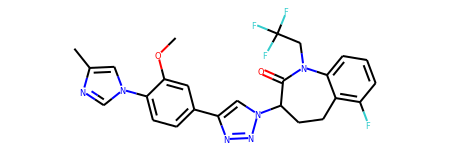

Shape of x_smiles =  (3416,)
Shape of X_smiles =  (3416, 1)

 x_smiles =  ['COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)nn2)ccc1-n1cnc(C)c1'
 'COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)nn2)ccc1-n1cnc(C)c1'
 'Cc1ccc2c(-c3nnc(SCCCN4CC5CC5(c5ccc(Cl)cc5)C4)n3C)cccc2n1'
 'CN(C)Cc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)c(Cl)c1'
 'CCCN1C(=O)CC2(CCN(CC3CCN(C(=O)OCC)CC3)CC2)c2cccnc21'
 'Cc1nc(C)c(-c2ccc3cc(CCN4CCCC4C)ccc3n2)cc1C#N'
 'COc1nccnc1C(C)C1=C(CCN(C)C)Cc2cc(F)ccc21'
 'O=C(NC(c1ccc(Cl)cc1)c1ccnc(F)c1)C1CCC(N2CCOCC2)CC1c1ccc(Br)cc1'
 'O=C1CCc2ccc(F)cc2N1CCCN1CCC(n2c(=O)[nH]c3ccccc32)CC1'
 'COc1cc(/C=C/c2nc(NCc3ccccc3)c3c4c(sc3n2)CCC4)ccc1-n1cnc(C)c1']


In [95]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["can_smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: Benchmark_Paper_2009_Ames_Mutagenicity

In [201]:
# import data

dataframe = pd.read_csv("data/Benchmark_Paper_2009_Ames_Mutagenicity/Mutagenicity_N6512_repaired_six_smiles.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  6512


,CAS_NO,Source,Activity,Steroid,WDI,Canonical_Smiles,REFERENCE
0,2475-33-4,VITIC,0,-1,NaN,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,"JUDSON, PN, COOKE, PA, DOERRER, NG, GREENE, N,..."
1,820-75-7,CCRIS,1,-1,NaN,NNC(=O)CNC(=O)C=N#N,"MCCANN,J, CHOI,E, YAMASAKI,E AND AMES,BN, DETE..."
2,2435-76-9,CCRIS,1,-1,NaN,[N-]=[N+]=C1C=NC(=O)NC1=O,"HIRAMOTO,K, KATO,T AND KIKUGAWA,K, MECHANISMS ..."
3,817-99-2,CCRIS,1,-1,NaN,C(C(=O)N)NC(=O)C=[N+]=[N-],"MCCANN,J, CHOI,E, YAMASAKI,E AND AMES,BN, DETE..."
4,116539-70-9,CCRIS,1,-1,NaN,CCCCN(CC(C1=CC(=C(C=C1)[O-])[N+]#N)O)N=O,"KIKUGAWA,K, KATO,T AND TAKEDA,Y, FORMATION OF ..."
...,...,...,...,...,...,...,...
6507,37319-17-8,CCRIS,0,-1,NaN,COC1COC(COCC2COC(OC)C(OS(=O)(=O)O)C2OS(=O)(=O)...,NCI/NTP CARCINOGENESIS TECHNICAL REPORT SERIES...
6508,117333-21-8,CCRIS,1,-1,NaN,OC(Cc1cn(N=O)c2ccccc12)C(=O)O,"OHARA,H, MIZUNO,M, DANNO,G, KANAZAWA,K, YOSHIO..."
6509,10605-21-7,VITIC,1,-1,CARBENDAZ,COC(=O)Nc1nc2ccccc2[nH]1,"JUDSON, PN, COOKE, PA, DOERRER, NG, GREENE, N,..."
6510,103393-71-1,EPA1,1,-1,NaN,ClCc1cccc2c3cccc4cccc(c12)c34,"KAZIUS, J, MCGUIRE, R AND BURSI, R. DERIVATION..."


In [202]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['Canonical_Smiles'].isnull()])
display(dataframe[dataframe['Activity'].isnull()])

,CAS_NO,Source,Activity,Steroid,WDI,Canonical_Smiles,REFERENCE


,CAS_NO,Source,Activity,Steroid,WDI,Canonical_Smiles,REFERENCE


In [203]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["Canonical_Smiles"].values)):

    smiles = dataframe["Canonical_Smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["Canonical_Smiles"].isin(bad_smiles) == False]

print(len(dataframe))

6512


In [204]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["Activity"].values))
N_negative = len(dataframe["Activity"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  3503
N_negative =  3009
Total fraction of positives =  0.5379299754299754


In [100]:
# create balanced data set by undersampling the positive class so that number of molecules becomes exactly the same in each class

N_positive_delete = len(dataframe["Activity"].values) - 2*len(dataframe[dataframe["Activity"] == 0].values)

dataframe = dataframe.drop(dataframe[dataframe["Activity"] == 1].sample(n = N_positive_delete, random_state = 42).index)

print("N_positive_delete = ", N_positive_delete)

N_positive_delete =  494


In [101]:
# define number of molecules

N_molecules = len(dataframe["Canonical_Smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  6018


In [102]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"Activity"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  3009
Fraction of Positives =  0.5
Shape of y =  (6018,)
Shape of Y =  (6018, 1)

 y =  [0 1 1 ... 1 1 1]


                  Smiles String
O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45


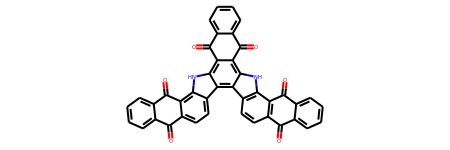

Shape of x_smiles =  (6018,)
Shape of X_smiles =  (6018, 1)

 x_smiles =  ['O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45'
 'NNC(=O)CNC(=O)C=N#N' '[N-]=[N+]=C1C=NC(=O)NC1=O'
 'C(C(=O)N)NC(=O)C=[N+]=[N-]' 'CCCCN(CC(C1=CC(=C(C=C1)[O-])[N+]#N)O)N=O'
 'C(C(C(=O)O)N)OC(=O)C=[N+]=[N-]' 'CCN(CC(C1=CC(=C(C=C1)[N+]#N)[O-])O)N=O'
 'CC(=O)OC1(CCC2C3C=C(Cl)C4=CC(=O)OCC4(C)C3CCC12C)C(=O)C'
 'Nc1nc(N)nc(N)n1' 'Cc1ccc(N=Nc2c(O)ccc3ccccc23)c(c1)[N+](=O)[O-]']


In [103]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["Canonical_Smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: PTC (MR/FR/MM/FM)

In [205]:
# import data

# here we currently import MR (= Male Rat), but there are also FR, MM and FM

dataframe = pd.read_csv("data/PCT/PTC_pn_MR.csv")
dataframe["act"] = ((dataframe["act"].values + 1)/2).astype(int) # convert labels -1/1 to 0/1

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  344


,nr,act,smiles
0,TR000,1,ClC(Cl)Cl
1,TR001,1,C12(Cl)C3(Cl)C(=O)C4(Cl)C1(Cl)C5(Cl)C(Cl)(Cl)C...
2,TR002,0,C(Cl)=C(Cl)Cl
3,TR004,0,S=P(OC)(OC)SCC(=O)NC
4,TR006a,1,OC(=O)CN(CC(O)=O)CC(O)=O
...,...,...,...
339,TR494,1,c12ccccc1C(=O)c3ccccc3C2=O
340,TR495,0,O=NO[Na]
341,TR496,1,C(O)(=O)CC(CC(=O)OC(C(C)CCCC)C(CC(C)CC(O)CCCCC...
342,TR499,1,[In]#P


In [206]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['act'].isnull()])
display(dataframe[dataframe['nr'].isnull()])

,nr,act,smiles


,nr,act,smiles


,nr,act,smiles


In [207]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        #print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

344


In [208]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["act"].values))
N_negative = len(dataframe["act"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  152
N_negative =  192
Total fraction of positives =  0.4418604651162791


In [108]:
# create balanced data set by undersampling the negative class so that number of molecules becomes exactly the same in each class

N_negative_delete = len(dataframe["act"].values) - 2*len(dataframe[dataframe["act"] == 1].values)

dataframe = dataframe.drop(dataframe[dataframe["act"] == 0].sample(n = N_negative_delete, random_state = 42).index)

print("N_negative_delete = ", N_negative_delete)

N_negative_delete =  40


In [109]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  304


In [110]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"act"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  152
Fraction of Positives =  0.5
Shape of y =  (304,)
Shape of Y =  (304, 1)

 y =  [1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 0]


                  Smiles String
ClC(Cl)Cl


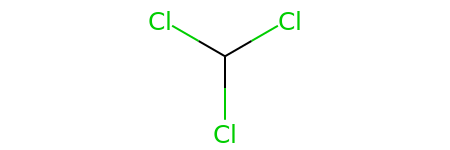

Shape of x_smiles =  (304,)
Shape of X_smiles =  (304, 1)

 x_smiles =  ['ClC(Cl)Cl'
 'C12(Cl)C3(Cl)C(=O)C4(Cl)C1(Cl)C5(Cl)C(Cl)(Cl)C2(Cl)C3(Cl)C45Cl'
 'C(Cl)=C(Cl)Cl' 'S=P(OC)(OC)SCC(=O)NC' 'OC(=O)CN(CC(O)=O)CC(O)=O'
 'c1cccc(c1)CCNC(=N)NC(N)=N'
 'C1(Cl)=C(Cl)C2(Cl)C3CC(Cl)C(Cl)C3C1(Cl)C2(Cl)Cl'
 'ClC12C(Cl)=C(Cl)C(Cl)(C3C=CC(Cl)C13)C2(Cl)Cl'
 'C(CN(CC(=O)O)CC(=O)O[Na])N(CC(=O)O[Na])CC(=O)O[Na]'
 'C12(Cl)C(Cl)=C(Cl)C(Cl)(C1(Cl)Cl)C3C2C4CC3C5OC45']


In [111]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: MUTAG

In [209]:
# import data

dataframe = pd.read_csv("data/MUTAG/MUTAG_188.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  188


,nr,smiles,act
0,0,c1ccc2c(c1)ccc3c2ccc(c3)[N+](=O)[O-],1
1,1,c1cc2cccnc2c(c1)[N+](=O)[O-],0
2,2,c1cc2c(cccn2)c(c1)[N+](=O)[O-],0
3,3,c1ccc-2c(c1)-c3cccc4c3c2c(cc4)[N+](=O)[O-],1
4,4,c1cc(c(cc1F)[N+](=O)[O-])F,0
...,...,...,...
183,183,c1cc2c(ccc-3c2c(c1)-c4c3cccc4[N+](=O)[O-])[N+]...,1
184,184,c1cc(c(cc1F)[N+](=O)[O-])[N+](=O)[O-],0
185,185,c1cc2c(cc1[N+](=O)[O-])CCN2,0
186,186,c1ccc2c(c1)c3ccccc3c4c2ccc(c4)[N+](=O)[O-],1


In [210]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['act'].isnull()])
display(dataframe[dataframe['nr'].isnull()])

,nr,smiles,act


,nr,smiles,act


,nr,smiles,act


In [211]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

188


In [212]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["act"].values))
N_negative = len(dataframe["act"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  125
N_negative =  63
Total fraction of positives =  0.6648936170212766


In [116]:
# create balanced data set by undersampling the positive class so that number of molecules becomes exactly the same in each class

N_positive_delete = len(dataframe["act"].values) - 2*len(dataframe[dataframe["act"] == 0].values)

dataframe = dataframe.drop(dataframe[dataframe["act"] == 1].sample(n = N_positive_delete, random_state = 42).index)

print("N_positive_delete = ", N_positive_delete)

N_positive_delete =  62


In [117]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  126


In [118]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"act"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  63
Fraction of Positives =  0.5
Shape of y =  (126,)
Shape of Y =  (126, 1)

 y =  [0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0]


                  Smiles String
c1cc2cccnc2c(c1)[N+](=O)[O-]


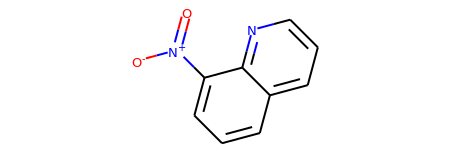

Shape of x_smiles =  (126,)
Shape of X_smiles =  (126, 1)

 x_smiles =  ['c1cc2cccnc2c(c1)[N+](=O)[O-]' 'c1cc2c(cccn2)c(c1)[N+](=O)[O-]'
 'c1ccc-2c(c1)-c3cccc4c3c2c(cc4)[N+](=O)[O-]' 'c1cc(c(cc1F)[N+](=O)[O-])F'
 'c1cc2c(cc(c3c2c4c1c(cc(c4cc3)[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]'
 'Cc1cc(ccc1[N+](=O)[O-])c2ccccc2'
 'CC(=O)Oc1ccc-2c(c1)Cc3c2ccc(c3)[N+](=O)[O-]'
 'C1=CC2=NC=NC2C=C1[N+](=O)[O-]'
 'c1cc2ccc(c3c2c4c1ccc(c4cc3)N)[N+](=O)[O-]'
 'C[N+]1=C2C=C(C=CC2C=N1)[N+](=O)[O-]']


In [119]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: Paper_2017_Life_Extension

In [220]:
# import data

dataframe = pd.read_csv("data//Paper_2017_Life_Extension/2017_Life_Extension.csv")

print("Number of Molecules = ", len(dataframe))
display(dataframe)

Number of Molecules =  1395


,nr,chemical_name,smiles,Reference,act
0,0,Succinimide,O=C1NC(=O)CC1,"Evason, K. et al., 2005. Anticonvulsant medica...",0
1,1,Flurazepam dihydrochloride,Clc1cc2c(N(CCN(CC)CC)C(=O)CN=C2c2ccccc2F)cc1,"Kornfeld, K. & Evason, K., 2006. Effects of an...",0
2,2,Betamethasone 17-valerate,FC12[C@@H]([C@@H]3C[C@H](C)C(OC(=O)CCCC)(C(=O)...,"Kornfeld, K. & Evason, K., 2006. Effects of an...",0
3,3,Liothyronine sodium salt,Ic1cc(cc(I)c1Oc1cc(I)c(O)cc1)C[C@@H](N)C(O)=O,"Kornfeld, K. & Evason, K., 2006. Effects of an...",0
4,4,Nadolol,O(C[C@H](O)CNC(C)(C)C)c1c2C[C@@H](O)[C@@H](O)C...,"Kornfeld, K. & Evason, K., 2006. Effects of an...",0
...,...,...,...,...,...
1390,1390,Ribose,C([C@@H]1[C@H]([C@H](C(O1)O)O)O)O,"Barardo et al, The DrugAge database of aging-r...",1
1391,1391,Xylose,C1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O,"Barardo et al, The DrugAge database of aging-r...",1
1392,1392,Galactose,C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O,"Barardo et al, The DrugAge database of aging-r...",1
1393,1393,(S)-2-hydroxyglutarate,OC(=O)CC[C@H](O)C(O)=O,"Barardo et al, The DrugAge database of aging-r...",1


In [221]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['act'].isnull()])
display(dataframe[dataframe['nr'].isnull()])
display(dataframe[dataframe['chemical_name'].isnull()])

,nr,chemical_name,smiles,Reference,act


,nr,chemical_name,smiles,Reference,act


,nr,chemical_name,smiles,Reference,act


,nr,chemical_name,smiles,Reference,act


In [222]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

1395


In [223]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["act"].values))
N_negative = len(dataframe["act"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  229
N_negative =  1166
Total fraction of positives =  0.16415770609318997


In [124]:
# create balanced data set by undersampling the negative class so that number of molecules becomes exactly the same in each class

N_negative_delete = len(dataframe["act"].values) - 2*len(dataframe[dataframe["act"] == 1].values)

dataframe = dataframe.drop(dataframe[dataframe["act"] == 0].sample(n = N_negative_delete, random_state = 42).index)

print("N_negative_delete = ", N_negative_delete) 

N_negative_delete =  937


In [125]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  458


In [126]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"act"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  229
Fraction of Positives =  0.5
Shape of y =  (458,)
Shape of Y =  (458, 1)

 y =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

                  Smiles String
Clc1cc2c(N(CCN(CC)CC)C(=O)CN=C2c2ccccc2F)cc1


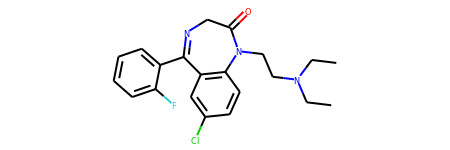

Shape of x_smiles =  (458,)
Shape of X_smiles =  (458, 1)

 x_smiles =  ['Clc1cc2c(N(CCN(CC)CC)C(=O)CN=C2c2ccccc2F)cc1' 'OC(=O)c1ccc(N)cc1'
 'OC(=O)CCC(=O)c1ccc(cc1)-c1ccccc1'
 'O1CCN(CC1)C[C@@H](NC(=O)CCCCCCCCC)[C@H](O)c1ccccc1'
 '[Hg](Cl)c1ccc(cc1)C(O)=O' '[nH]1ncc2c1C[C@H]1[C@@H](N(CCC1)CCC)C2'
 'Br\\C=C\\C1=CN([C@H]2O[C@H](CO)[C@H](O)C2)C(=O)NC1=O'
 'Brc1ccc(cc1)\\C(=C\\CN(C)C)\\c1cccnc1'
 'ClC=1CS[C@H]2N(C=1C(O)=O)C(=O)[C@@H]2NC(=O)[C@@H](N)c1ccccc1'
 'Clc1c2c(cc(O)c1O)[C@H](CN(CC2)CC=C)c1ccccc1']


In [127]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

## Prepare Data: Diamond_Light_Source_Sars_Cov_2_MPro

In [227]:
# import data

dataframe = pd.read_csv("data//Diamond_Light_Source_Sars_Cov_2_MPro/Mpro_hits_clean_data.csv")

print("Number of Molecules = ", len(dataframe))

display(dataframe)

Number of Molecules =  1755


,Unnamed: 0,Unnamed: 0.1,CrystalName,CompoundCode,smiles,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID,Unnamed: 8
0,0,32,Mpro-x0033,Z1992316315,CN1CCN(CCN)CC1(C)C,OK: No comment:No comment,success,1.97,0,None,NaN
1,1,33,Mpro-x0034,Z1787158625,CC(=O)NC1CCC(N)CC1,OK: No comment:No comment,success,1.91,0,None,NaN
2,2,34,Mpro-x0035,Z1275599911,CC(=O)N1CCCC2(C1)CCCCCC2,OK: No comment:No comment,success,1.79,0,None,NaN
3,3,35,Mpro-x0036,Z363104204,CNC(=O)C1=C(C)ON=C1C=2C=CC(F)=CC2,OK: No comment:No comment,success,2.07,0,None,NaN
4,4,37,Mpro-x0038,Z818727262,C(NC1CC1)C2CCOC2,OK: No comment:No comment,success,2.02,0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1750,1750,2392,Mpro-x2897,13 C08,O=C(C=C)N(CCN1C(NCC#C)=O)C2=C1C=CC=C2,OK: Clear:No comment,success,1.86,0,None,NaN
1751,1751,2393,Mpro-x2898,13 G08,O=C(C=C)N1CCCC2=C1C=CC(C(NCC3=CC=CC=C3)=O)=C2,OK: Clear:No comment,success,1.80,0,None,NaN
1752,1752,2394,Mpro-x2899,13 C09,O=C(C=C)N1CCN(C(NCCN)=O)C2=C1C=CC=C2,OK: Clear:No comment,success,2.03,0,None,NaN
1753,1753,2395,Mpro-x2900,13 F09,O=C(NCC#C)C1=CC2=C(N(C(C=C)=O)CCC2)C=C1,OK: Clear:No comment,success,1.92,0,None,NaN


In [228]:
# check for missing values (i.e. NA values)

display(dataframe[dataframe['smiles'].isnull()])
display(dataframe[dataframe['RefinementOutcome'].isnull()])

,Unnamed: 0,Unnamed: 0.1,CrystalName,CompoundCode,smiles,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID,Unnamed: 8


,Unnamed: 0,Unnamed: 0.1,CrystalName,CompoundCode,smiles,MountingResult,DataCollectionOutcome,DataProcessingResolutionHigh,RefinementOutcome,Deposition_PDB_ID,Unnamed: 8


In [229]:
# filter out Smiles which produce error messages in rdkit

bad_smiles = []

for k in range(len(dataframe["smiles"].values)):

    smiles = dataframe["smiles"].values[k]
    
    sio = sys.stderr = StringIO()
    Chem.MolFromSmiles(smiles)
    error_message = sio.getvalue()
    
    if error_message != "" and error_message[0:13] != "RDKit WARNING":
        print(k)
        print(error_message)
        print(smiles, "\n \n \n \n")
        bad_smiles.append(smiles)

dataframe = dataframe[dataframe["smiles"].isin(bad_smiles) == False]

print(len(dataframe))

1755


In [230]:
# compute number of positive and negative instances

N_positive = int(np.sum(dataframe["RefinementOutcome"].values))
N_negative = len(dataframe["RefinementOutcome"]) - N_positive

print("N_positive = ", N_positive)
print("N_negative = ", N_negative)
print("Total fraction of positives = ", N_positive/(N_positive + N_negative))

N_positive =  113
N_negative =  1642
Total fraction of positives =  0.06438746438746439


In [132]:
# create balanced data set by undersampling the negative class so that number of molecules becomes exactly the same in each class

N_negative_delete = len(dataframe["RefinementOutcome"].values) - 2*len(dataframe[dataframe["RefinementOutcome"] == 1].values)

dataframe = dataframe.drop(dataframe[dataframe["RefinementOutcome"] == 0].sample(n = N_negative_delete, random_state = 42).index)

print("N_negative_delete = ", N_negative_delete) 

N_negative_delete =  1529


In [133]:
# define number of molecules

N_molecules = len(dataframe["smiles"].values)

print("Number of Molecules = ", N_molecules)

Number of Molecules =  226


In [134]:
# construct target variable y/Y (hERG inhibition)

# extract labels
y = dataframe.loc[:,"RefinementOutcome"].values
Y = np.reshape(y, (len(y), 1))

print("Number of Positives = ", np.sum(y))
print("Fraction of Positives = ", np.sum(y)/N_molecules)


print("Shape of y = ", y.shape)
print("Shape of Y = ", Y.shape)

print("\n y = ", y)


Number of Positives =  113
Fraction of Positives =  0.5
Shape of y =  (226,)
Shape of Y =  (226, 1)

 y =  [0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0
 0 0 0 0]


                  Smiles String
CNC(=O)C=1C=CC=C(N1)C(=O)O


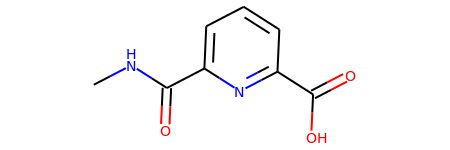

Shape of x_smiles =  (226,)
Shape of X_smiles =  (226, 1)

 x_smiles =  ['CNC(=O)C=1C=CC=C(N1)C(=O)O' 'COC=1C=CC(CCC2(C)NC(=O)NC2=O)=CC1'
 'CC(NC(=O)C)C1=NN=C2C=CC=CN12' 'CC(=O)N1CCN(CC1)C=2C=CC(Cl)=CC2'
 'CN(C)S(=O)(=O)N1CCN(C)CC1' 'CS(=O)(=O)NCCC=1C=CC=CC1'
 'CC(=O)NCCC1=CNC=2C=CC(F)=CC12' 'CC(=O)NC=1C=NC=CC1C'
 'CCCC1=CC(=O)OC=2C=C(OC(=O)C)C=CC12' 'CNCC=1C=CC(=CC1)C(F)(F)F']


In [135]:
# extract Smiles strings

X_smiles = np.reshape(dataframe["smiles"].values, (N_molecules, 1))
x_smiles = X_smiles[:,0]

print("                  Smiles String")
print(X_smiles[0:1][0][0])

for s in x_smiles[0:1]:
    molecule = Chem.MolFromSmiles(s)
    display(molecule)
    
print("Shape of x_smiles = ", x_smiles.shape)
print("Shape of X_smiles = ", X_smiles.shape)

print("\n x_smiles = ", x_smiles[0:10])

# Use Classification Method

## Implement your favourite classification method here